<a href="https://colab.research.google.com/github/mangekkyo/Machine-learning/blob/main/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q4.

In [ ]:
#importing libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,UpSampling2D
from keras.utils import to_categorical,plot_model
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#dividing dataset into train and test
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [ ]:
#rescaling
from keras.layers import Input
from tensorflow.keras import Model
train_images1 = train_images.astype('float32') / 255.0
test_images1 = test_images.astype('float32') / 255.0


# Define dimensions
input_dim = train_images1.shape[1]

# Architecture-encoder
input_img = Input(shape=(input_dim,))
enc_layer_1=Dense(500,activation='sigmoid')(input_img)
enc_layer_2=Dense(200,activation='sigmoid')(enc_layer_1)
enc_layer_3=Dense(100,activation='sigmoid')(enc_layer_2)
encoder=enc_layer_3

#Architecture-decoder
dec_layer_1=Dense(100,activation='sigmoid')(encoder)
dec_layer_2=Dense(200,activation='sigmoid')(dec_layer_1)
dec_layer_3=Dense(500,activation='sigmoid')(dec_layer_2)
dec_layer_4=Dense(input_dim,activation='sigmoid')(dec_layer_3)
decoder=dec_layer_4

autoencoder = Model(input_img, decoder)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#fit the model
history=autoencoder.fit(train_images1, train_images1, epochs=5, batch_size=128, shuffle=True, validation_data=(test_images1, test_images1))

Epoch 1/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0585 - val_loss: 0.0582
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0584 - val_loss: 0.0583
Epoch 3/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0585 - val_loss: 0.0582
Epoch 4/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0585 - val_loss: 0.0582
Epoch 5/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0585 - val_loss: 0.0582


In [ ]:
#auntoender-CNN
#architecture
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
history=autoencoder.fit(train_images1, train_images1, epochs=5, batch_size=128, shuffle=True, validation_data=(test_images1, test_images1))


Epoch 1/5
469/469 [==============================] - 6s 7ms/step - loss: 0.1792 - val_loss: 0.0929
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0888 - val_loss: 0.0841
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0827 - val_loss: 0.0805
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0799 - val_loss: 0.0781
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0782 - val_loss: 0.0768


In [ ]:
#deep neural network
x = Dense(128, activation='relu')(input_img)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(1, activation='sigmoid')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history=autoencoder.fit(train_images1, train_images1, epochs=5, batch_size=128, shuffle=True, validation_data=(test_images1, test_images1))


Epoch 1/5
469/469 [==============================] - 16s 27ms/step - loss: 0.1166 - val_loss: 0.0586
Epoch 2/5
469/469 [==============================] - 13s 27ms/step - loss: 0.0587 - val_loss: 0.0582
Epoch 3/5
469/469 [==============================] - 13s 27ms/step - loss: 0.0585 - val_loss: 0.0582
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0585 - val_loss: 0.0582
Epoch 5/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0585 - val_loss: 0.0582


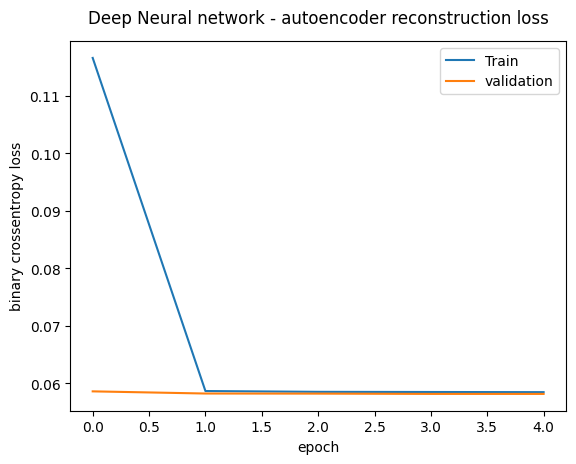

In [ ]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('epoch')
plt.ylabel('binary crossentropy loss')
plt.title("Deep Neural network - autoencoder reconstruction loss",pad=13)
plt.legend(loc="upper right")
plt.show()

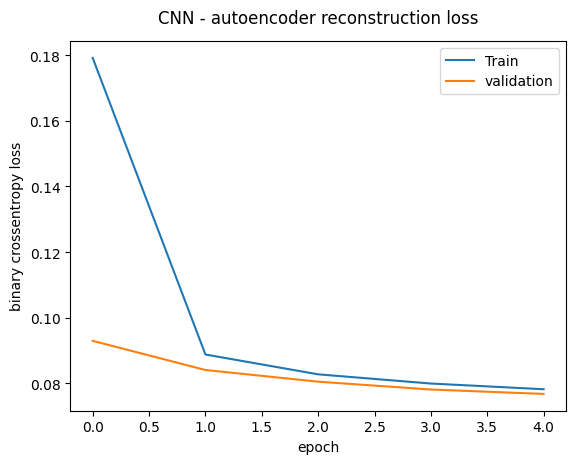

In [ ]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('epoch')
plt.ylabel('binary crossentropy loss')
plt.title("CNN - autoencoder reconstruction loss",pad=13)
plt.legend(loc="upper right")
plt.show()

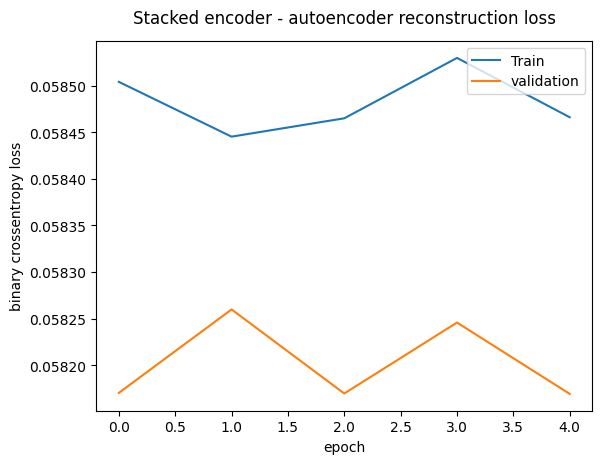

In [ ]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('epoch')
plt.ylabel('binary crossentropy loss')
plt.title("Stacked encoder - autoencoder reconstruction loss",pad=13)
plt.legend(loc="upper right")
plt.show()

The deep neural network autoencoder and stacked encoder showed the lowest loss rate when compared to CNN.
 Deep Neural network shows least loss of 0.05, CNN shows least loss of 0.07 and Stacked encoder shows least loss of 0.05.